### **IMPORTING LIBRARIES**

In [ ]:
# importing packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **IMPORTING DATA**

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/MODEL/GOLD PRICE PREDICTION/DATA/data.csv")

In [ ]:
df = pd.DataFrame(data)

In [ ]:
data

,week no,price
0,1,"1,852.80"
1,2,"2,010.40"
2,3,"1,974.90"
3,4,"1,960.90"
4,5,"2,119.40"
...,...,...
513,514,"133,235.10"
514,515,"135,587.90"
515,516,"134,864.50"
516,517,"135,230.70"


### **DATA**

In [ ]:
df.head()

,week no,price
0,1,"1,852.80"
1,2,"2,010.40"
2,3,"1,974.90"
3,4,"1,960.90"
4,5,"2,119.40"


In [ ]:
#Lets have a quick look of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   week no  518 non-null    int64 
 1   price    518 non-null    object
dtypes: int64(1), object(1)
memory usage: 8.2+ KB


In [ ]:
#Clearly we see there is no null value in the dataset
#Lets study the Statistical Inferance of the dataset
df.describe()

,week no
count,518.000000
mean,259.500000
std,149.677988
min,1.000000
25%,130.250000
50%,259.500000
75%,388.750000
max,518.000000


In [ ]:
df.isnull().sum()

week no    0
price      0
dtype: int64

### **DATA VISUALIZATION**

In [ ]:
print(data.corr())

         week no
week no      1.0


In [ ]:
import seaborn as sb
import matplotlib.pyplot as mp

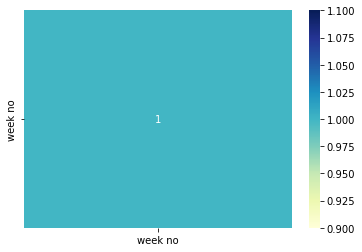

In [ ]:
# plotting correlation heatmap
dataplot = sb.heatmap(data.corr(), cmap="YlGnBu", annot=True)
# displaying heatmap
mp.show()

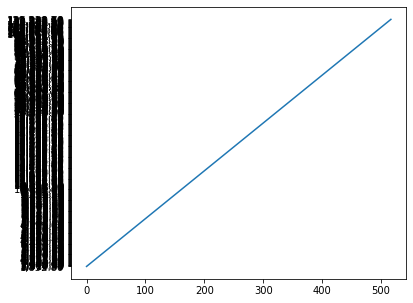

In [ ]:
#Now see the correlation matrix and heatmap
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()
plt.figure(figsize = (6,5))
plt.plot(df['price'])

**Split the data into target values and feature values :**

In [ ]:
df["price"] = [float(str(i).replace(",", "")) for i in df["price"]]

In [ ]:
X = df.drop(['week no'],axis=1)
Y = df['price']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

# **Model Training: Random Forest Regressor :**

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

## **Model Evaluation**

In [ ]:
test_data_prediction = regressor.predict(X_test)

In [ ]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9996776896425726


## **Comparing the Actual Values and the Predicted Values**

In [ ]:
Y_test = list(Y_test)

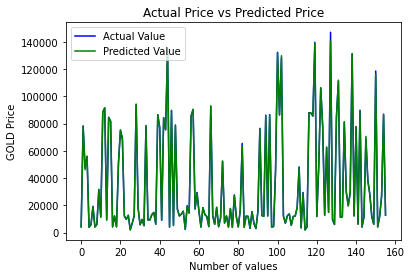

In [ ]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GOLD Price')
plt.legend()
plt.show()

**How to use this model to predict daily moves?**

In [ ]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X, Y)

DecisionTreeRegressor(random_state=0)

In [ ]:
# predicting a new value

# test the output by changing values, like 3750
y_pred = regressor.predict([[550]])

# print the predicted price
print("Predicted price: % d\n"% y_pred)


Predicted price:  1852



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
import datetime as dt
current_date = dt.datetime.now()

## **LINEAR REGRESSION**

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X, Y)

LinearRegression()

In [ ]:
model = LinearRegression().fit(X, Y)

In [ ]:
r_sq = model.score(X, Y)
print('coefficient of determination:', r_sq)

coefficient of determination: 1.0


In [ ]:
print('intercept:', model.intercept_)

intercept: 0.0


In [ ]:
print('slope:', model.coef_)

slope: [1.]


In [ ]:
y_pred = model.predict(X)

In [ ]:
print('predicted response:', y_pred, sep='\n')

predicted response:
[  1852.8   2010.4   1974.9   1960.9   2119.4   2248.9   2309.7   2409.8
   2865.    3204.    3183.5   3731.8   5358.    5286.7   4511.5   4164.4
   4053.3   4711.1   5012.4   4867.    5211.1   5112.3   4833.7   4705.2
   4430.    4110.2   4093.1   4107.8   4034.    3968.2   3632.1   3705.
   4039.1   3998.6   3766.8   3749.3   3507.    3440.4   3064.7   3274.2
   3107.    2970.    3224.8   3468.6   4223.6   4094.    4050.1   4296.4
   4734.4   4880.2   4183.6   4309.    4365.    4153.3   4255.1   4230.6
   4204.6   4021.9   3949.9   4063.4   3966.9   4129.8   4228.2   4116.2
   4139.7   4173.9   3934.7   4003.5   4016.6   4070.5   4105.2   3908.7
   3813.3   3869.6   3856.6   4005.6   3917.7   3910.    3800.5   3918.4
   3894.    3902.6   3903.3   3871.6   4214.4   4175.8   4210.4   4199.6
   4253.5   4294.2   4345.9   4702.3   5263.4   5431.1   5188.3   5107.2
   5287.4   5213.6   5249.5   5576.8   5825.5   5759.7   5839.1   6003.6
   5946.9   6027.9   6028.1   62

In [ ]:
y_pred = model.intercept_ + model.coef_ * X

In [ ]:
print('predicted response:', y_pred, sep='\n')

predicted response:
        price
0      1852.8
1      2010.4
2      1974.9
3      1960.9
4      2119.4
..        ...
513  133235.1
514  135587.9
515  134864.5
516  135230.7
517  139210.2

[518 rows x 1 columns]


In [ ]:
dataframe = pd.DataFrame(y_pred)

In [ ]:
dataframe

,price
0,1852.8
1,2010.4
2,1974.9
3,1960.9
4,2119.4
...,...
513,133235.1
514,135587.9
515,134864.5
516,135230.7
